In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
data_files = [i for i in os.listdir() if '.xls' in i]

In [3]:
vglut_df = pd.read_excel(data_files[15], sheet_name = 1, header = 1)[['Cell Number Of Vesicles', 'ID']].set_index('ID').rename(columns = {'Cell Number Of Vesicles' : 'VGlut1_puncta'})
gad2_df = pd.read_excel(data_files[15], sheet_name = 2, header = 1)[['Cell Number Of Vesicles', 'ID']].set_index('ID').rename(columns = {'Cell Number Of Vesicles' : 'Gad2_puncta'})
il34_df = pd.read_excel(data_files[15], sheet_name = 3, header = 1)[['Cell Number Of Vesicles', 'ID']].set_index('ID').rename(columns = {'Cell Number Of Vesicles' : 'IL34_puncta'})
cell_vol_df = pd.read_excel(data_files[15], sheet_name = 4, header = 1).set_index('ID')['Cell Volume']
summary_df = pd.read_excel(data_files[15], sheet_name = 0, header = 1).set_index('Variable')

In [4]:
combo_df = vglut_df.join(gad2_df).join(il34_df).join(cell_vol_df)

In [5]:
combo_df = combo_df[combo_df['Cell Volume'] > 500]
combo_df['ratio'] = combo_df['Gad2_puncta'] / combo_df['VGlut1_puncta']
combo_df.reset_index(inplace = True)

In [6]:
combo_df['VGlut1_puncta_adj'] = 500*(combo_df['VGlut1_puncta'] / combo_df['Cell Volume'])
combo_df['Gad2_puncta_adj'] = 500*(combo_df['Gad2_puncta'] / combo_df['Cell Volume'])
combo_df['IL34_puncta_adj'] = 500*(combo_df['IL34_puncta'] / combo_df['Cell Volume'])

AttributeError: 'Rectangle' object has no property 'ylabel'

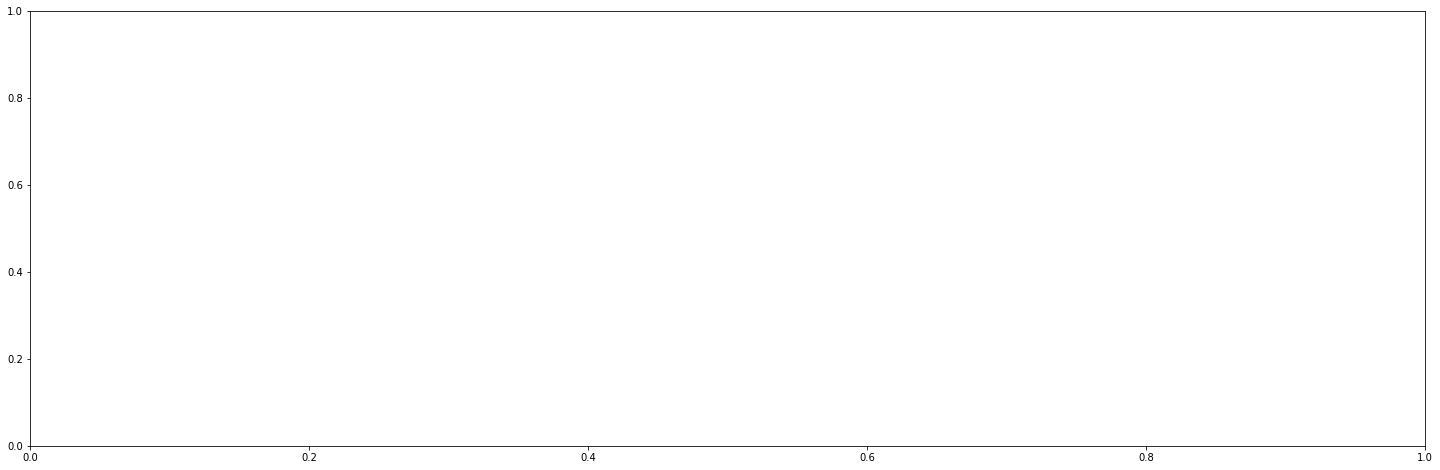

In [7]:
fig = combo_df[['Gad2_puncta_adj', 'VGlut1_puncta_adj']].plot(figsize=(25,8), kind = 'bar', title = data_files[15], ylabel = '# of Puncta / 500um3').get_figure()
fig.savefig(data_files[15] + '.png')

In [12]:
cell_type = ['Unknown'] * len(combo_df)

for i in range(len(combo_df)):
    if combo_df['VGlut1_puncta_adj'][i] > 10:
        if combo_df['Gad2_puncta_adj'][i] < 7:
            cell_type[i] = 'VGlut1'
    elif combo_df['VGlut1_puncta_adj'][i] < 10:
        if combo_df['Gad2_puncta_adj'][i] > 7:
            cell_type[i] = 'Gad2'
    elif combo_df['VGlut1_puncta_adj'][i] < 10:
        if combo_df['Gad2_puncta_adj'][i] < 10:
            cell_type[i] = 'Unknown'
    elif combo_df['VGlut1_puncta_adj'][i] < 2:
        if combo_df['Gad2_puncta_adj'][i] < 2:
            cell_type[i] = 'NAN'
            
combo_df['cell_type'] = cell_type

In [13]:
np.unique(combo_df['cell_type'], return_counts = True)

(array(['Gad2', 'Unknown'], dtype=object), array([  8, 148], dtype=int64))

In [10]:
combo_df.groupby('cell_type')['IL34_puncta_adj'].mean()

cell_type
Gad2       5.026504
Unknown    4.901926
Name: IL34_puncta_adj, dtype: float64

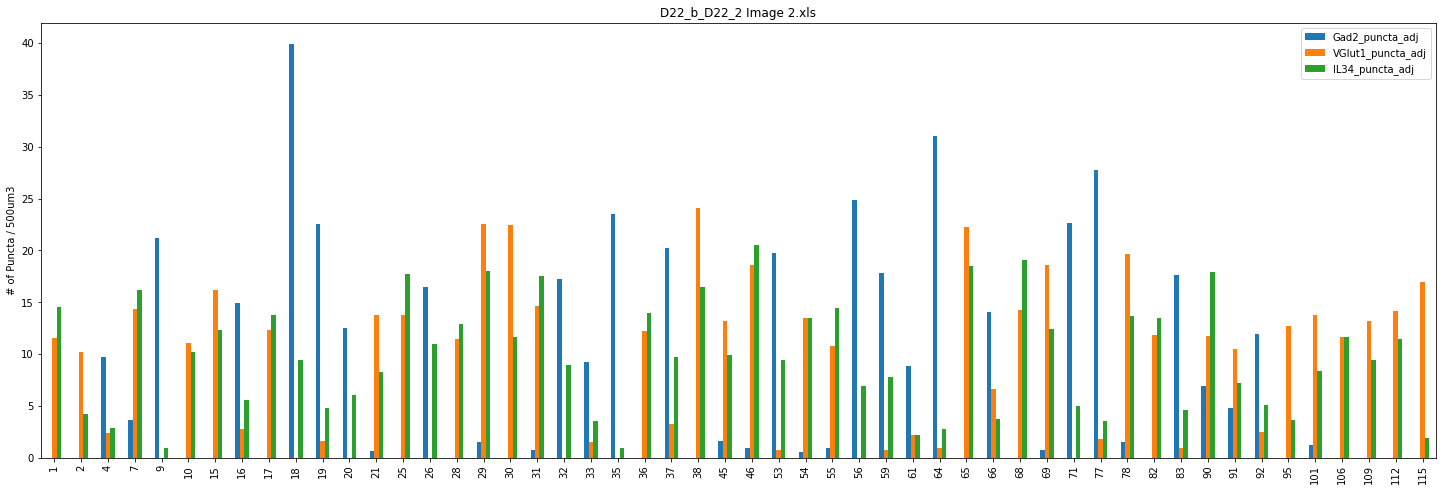

In [11]:
known_cells = combo_df[combo_df['cell_type'] != 'Unknown']
fig = known_cells[['Gad2_puncta_adj', 'VGlut1_puncta_adj', 'IL34_puncta_adj']].plot(figsize=(25,8), kind = 'bar', title = data_files[15], ylabel = '# of Puncta / 500um3').get_figure()
fig.savefig(data_files[15] + '_known_cells.png')

In [12]:
output_df = pd.DataFrame(known_cells.groupby('cell_type')['IL34_puncta_adj'].mean())
output_df.rename(columns = {'IL34_puncta_adj' : file.split('.')[0].split(' ')[0]}, inplace = True)

NameError: name 'file' is not defined

In [13]:
known_cells.groupby('cell_type')['IL34_puncta_adj'].mean()

cell_type
Gad2       5.472410
VGlut1    12.731576
Name: IL34_puncta_adj, dtype: float64

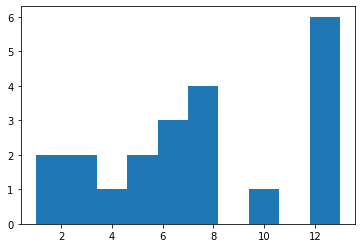

In [21]:
known_cells[known_cells['cell_type'] == 'Gad2']['IL34_puncta'].hist(grid = False);

# Alright, it is time to wrap this all up in a single script that loops through all the files in the folder

need to re-export 'D04_d_D04_4 Image 4.xls'

In [40]:
data_files = [i for i in os.listdir() if '.xls' in i]
final_df = pd.DataFrame(index = ['Gad2', 'VGlut1', 'Gad2_variance', 'VGlut1_variance'])
total_il34 = {}

for file in data_files:
    vglut_df = pd.read_excel(file, sheet_name = 1, header = 1)[['Cell Number Of Vesicles', 'ID']].set_index('ID').rename(columns = {'Cell Number Of Vesicles' : 'VGlut1_puncta'})
    gad2_df = pd.read_excel(file, sheet_name = 2, header = 1)[['Cell Number Of Vesicles', 'ID']].set_index('ID').rename(columns = {'Cell Number Of Vesicles' : 'Gad2_puncta'})
    il34_df = pd.read_excel(file, sheet_name = 3, header = 1)[['Cell Number Of Vesicles', 'ID']].set_index('ID').rename(columns = {'Cell Number Of Vesicles' : 'IL34_puncta'})
    cell_vol_df = pd.read_excel(file, sheet_name = 4, header = 1).set_index('ID')['Cell Volume']
    summary_df = pd.read_excel(file, sheet_name = 0, header = 1).set_index('Variable')
    
    combo_df = vglut_df.join(gad2_df).join(il34_df).join(cell_vol_df)
    
    combo_df = combo_df[combo_df['Cell Volume'] > 500]
    combo_df['ratio'] = combo_df['Gad2_puncta'] / combo_df['VGlut1_puncta']
    combo_df.reset_index(inplace = True)
    
    combo_df['VGlut1_puncta_adj'] = 500*(combo_df['VGlut1_puncta'] / combo_df['Cell Volume'])
    combo_df['Gad2_puncta_adj'] = 500*(combo_df['Gad2_puncta'] / combo_df['Cell Volume'])
    combo_df['IL34_puncta_adj'] = 500*(combo_df['IL34_puncta'] / combo_df['Cell Volume'])
    
    #fig1 = combo_df[['Gad2_puncta_adj', 'VGlut1_puncta_adj']].plot(figsize=(25,8), 
     #                                                              kind = 'bar', 
      #                                                             title = file.split('.')[0], 
       #                                                            ylabel = '# of Puncta / 500um3').get_figure();
    #fig1.savefig(file.split('.')[0] + '.png')
    
    
    cell_type = ['Unknown'] * len(combo_df)
    for i in range(len(combo_df)):
        if combo_df['VGlut1_puncta_adj'][i] > 10:
            if combo_df['Gad2_puncta_adj'][i] < 7:
                cell_type[i] = 'VGlut1'
        if combo_df['VGlut1_puncta_adj'][i] < 10:
            if combo_df['Gad2_puncta_adj'][i] > 7:
                cell_type[i] = 'Gad2'
        if combo_df['VGlut1_puncta_adj'][i] < 10:
            if combo_df['Gad2_puncta_adj'][i] < 7:
                cell_type[i] = 'NAN'
        #elif combo_df['VGlut1_puncta_adj'][i] < 10:
         #   if combo_df['Gad2_puncta_adj'][i] < 10:
          #      cell_type[i] = 'Unknown'


    combo_df['cell_type'] = cell_type
    
    print(np.unique(cell_type))
    
    
    known_cells = combo_df[combo_df['cell_type'] != 'Unknown']
    #print(known_cells['cell_type'])
    #fig2 = known_cells[['Gad2_puncta_adj', 'VGlut1_puncta_adj', 'IL34_puncta_adj']].plot(figsize=(25,8), 
     #                                                                                    kind = 'bar', 
      #                                                                                   title = file.split('.')[0], 
       #                                                                                  ylabel = '# of Puncta / 500um3').get_figure();
    #fig2.savefig(file.split('.')[0] + '_known_cells.png')
    #
    #
    #fig3 = known_cells[['Gad2_puncta_adj', 'VGlut1_puncta_adj']].plot(figsize=(25,8), 
     #                                                                                    kind = 'bar', 
      #                                                                                   title = file.split('.')[0], 
       #                                                                                  ylabel = '# of Puncta / 500um3').get_figure();
    #fig3.savefig(file.split('.')[0] + '_known_cells_no_il34.png')
    
    
    output_df = pd.DataFrame(known_cells.groupby('cell_type')['IL34_puncta_adj'].mean())
    output_df.loc['VGlut1_variance'] = np.var(known_cells[known_cells['cell_type'] == 'VGlut1']['IL34_puncta_adj'])
    output_df.loc['Gad2_variance'] = np.var(known_cells[known_cells['cell_type'] == 'Gad2']['IL34_puncta_adj'])
    output_df.rename(columns = {'IL34_puncta_adj' : file.split('.')[0].split(' ')[0]}, inplace = True)
    
    final_df = final_df.join(output_df)
    total_il34[file] = summary_df.loc['Number of Vesicles IL34s per Time Point']['Value']

['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'VGlut1']
['Gad2' 'NAN']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'VGlut1']
['Gad2' 'NAN' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 'Unknown' 'VGlut1']
['Gad2' 'NAN' 

In [43]:
final_df

,D01_a_D01_1,D01_b_D01_2,D01_c_D01_3,D01_d_D01_4,D01_e_D01_5,D02_a_D02_0,D02_b_D02_1,D02_c_D02_2,D03_b_D03_2,D03_c_D03_3,...,D22_d_D22_4,D22_e_D22_5,D22_f_D22_6,D23_a_D23_1,D23_b_D23_2,D23_c_D23_3,D24_a_D24_1,D24_b_D24_2,D24_c_D24_3,D24_d_D24_4
Gad2,11.805900,10.481735,10.378839,3.455186,10.049855,8.274328,5.212004,1.059664,13.565759,7.236127,...,7.584489,6.464801,6.933831,6.507700,5.366183,7.707007,3.105509,6.885519,6.684579,7.783524
VGlut1,20.921021,14.327784,22.754861,NaN,9.574059,12.688911,NaN,1.081954,23.483657,11.699333,...,8.912648,11.899442,12.793865,8.831434,9.306874,11.044214,8.385786,11.293441,11.217659,5.826305
Gad2_variance,12.524654,14.342200,18.778197,0.000000,36.298728,6.716644,14.723093,1.248256,16.816420,5.644049,...,7.891471,14.518133,9.017385,4.878652,6.819487,8.688427,2.019317,2.124241,7.227917,17.110547
VGlut1_variance,54.251169,43.312889,12.048404,NaN,19.066754,27.776379,NaN,1.001165,41.198379,15.435091,...,18.203347,24.047120,25.605255,9.771597,12.453380,15.481238,9.158059,13.995309,39.306122,9.065037


In [23]:
final_df.to_csv('combined_output.csv')

In [27]:
pd.Series(total_il34).to_csv('total_il34_output.csv')

In [23]:
final_df

,D04_b_D04_2,D21_d_D21_4,D03_b_D03_2,D03_d_D03_4,D01_c_D01_3,D21_a_D21_1,D04_d_D04_4,D21_b_D21_2,D15_c_D15_3,D07_a_D07_1,...,D17_b_D17_2,D23_c_D23_3,D02_a_D02_0,D10_a_D10_1,D10_b_D10_2,D19_d_D19_4,D01_e_D01_5,D17_a_D17_1,D19_b_D19_2,D10_d_D10_4
Gad2,11.207448,3.279484,13.565759,9.186270,10.378839,8.324956,11.862367,4.703856,6.224418,7.282991,...,5.312409,7.707007,8.274328,13.102304,6.230125,3.767347,10.049855,4.246481,7.323945,4.406128
VGlut1,18.333020,7.717302,23.483657,18.424562,22.754861,14.668532,7.734389,9.537244,13.733406,12.042204,...,6.575958,11.044214,12.688911,20.353576,13.521412,7.661471,9.574059,7.600375,8.534185,8.201429
Gad2_variance,31.463891,4.095677,16.816420,29.318863,18.778197,27.359052,26.545744,11.174758,6.552690,10.540409,...,10.346409,8.688427,6.716644,22.890813,14.375906,3.498332,36.298728,7.712328,14.416237,6.748422
VGlut1_variance,45.759820,6.112957,41.198379,23.600815,12.048404,1.519200,32.725859,10.209784,13.696512,4.329793,...,11.337613,15.481238,27.776379,43.205971,41.237809,13.105233,19.066754,14.232378,11.680836,7.877106


# Looping through again to make histograms

D01_a_D01_1 Image 1.xls
D01_b_D01_2 Image 2.xls
D01_c_D01_3 Image 3_mightbebad.xls
D01_d_D01_4 Image 4_alsobad.xls
D01_e_D01_5 Image 5.xls
D02_a_D02_0.xls
D02_b_D02_1 Image 2.xls
D02_c_D02_2 Image 3.xls
D03_b_D03_2 Image 2.xls
D03_c_D03_3 Image 3.xls
D03_d_D03_4 Image 4.xls
D04_b_D04_2 Image 2.xls
D04_c_D04_3 Image 3_mightbebad.xls
D04_d_D04_4 Image 4.xls
D05_a_D05_1 Image 1.xls
D05_b_D05_2 Image 2.xls
D05_c_D05_3 Image 3_mightbebad.xls
D06_a_D06_1 Image 1.xls
D06_c_D06_3 Image 3.xls
D06_d_D06_4 Image 4.xls
D07_a_D07_1 Image 1.xls
D07_b_D07_2 Image 2.xls
D07_c_D07_3 Image 3.xls
D08_a_D08_1 Image 1.xls
D08_b_D08_2 Image 2.xls
D08_d_D08_4 Image 4.xls
D09_a_D09_1 Image 1.xls
D09_b_D09_2 Image 2.xls
D09_c_D09_3 Image 3.xls
D10_a_D10_1 Image 1.xls
D10_b_D10_2 Image 2.xls
D10_c_D10_3 Image 3.xls
D10_d_D10_4 Image 4.xls
D10_e_D10_5 Image 5.xls
D11_a_D11_1 Image 1.xls
D11_b_D11_2 Image 2.xls
D11_c_D11_3 Image 3.xls
D12_a_D12_1 Image 1.xls
D12_b_D12_2 Image 2.xls
D12_d_D12_3_512 Image 4.xls
D13

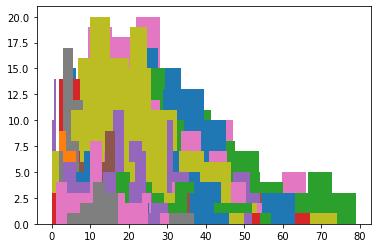

In [24]:
data_files = [i for i in os.listdir() if '.xls' in i]
final_df = pd.DataFrame(index = ['Gad2', 'VGlut1', 'Gad2_variance', 'VGlut1_variance'])
total_il34 = {}

for file in data_files:
    print(file)
    vglut_df = pd.read_excel(file, sheet_name = 1, header = 1)[['Cell Number Of Vesicles', 'ID']].set_index('ID').rename(columns = {'Cell Number Of Vesicles' : 'VGlut1_puncta'})
    gad2_df = pd.read_excel(file, sheet_name = 2, header = 1)[['Cell Number Of Vesicles', 'ID']].set_index('ID').rename(columns = {'Cell Number Of Vesicles' : 'Gad2_puncta'})
    il34_df = pd.read_excel(file, sheet_name = 3, header = 1)[['Cell Number Of Vesicles', 'ID']].set_index('ID').rename(columns = {'Cell Number Of Vesicles' : 'IL34_puncta'})
    cell_vol_df = pd.read_excel(file, sheet_name = 4, header = 1).set_index('ID')['Cell Volume']
    summary_df = pd.read_excel(file, sheet_name = 0, header = 1).set_index('Variable')
    
    combo_df = vglut_df.join(gad2_df).join(il34_df).join(cell_vol_df)
    
    combo_df = combo_df[combo_df['Cell Volume'] > 500]
    combo_df['ratio'] = combo_df['Gad2_puncta'] / combo_df['VGlut1_puncta']
    combo_df.reset_index(inplace = True)
    
    combo_df['VGlut1_puncta_adj'] = 500*(combo_df['VGlut1_puncta'] / combo_df['Cell Volume'])
    combo_df['Gad2_puncta_adj'] = 500*(combo_df['Gad2_puncta'] / combo_df['Cell Volume'])
    combo_df['IL34_puncta_adj'] = 500*(combo_df['IL34_puncta'] / combo_df['Cell Volume'])
    
    cell_type = ['Unknown'] * len(combo_df)

    for i in range(len(combo_df)):
        if combo_df['VGlut1_puncta_adj'][i] > 10:
            if combo_df['Gad2_puncta_adj'][i] < 7:
                cell_type[i] = 'VGlut1'
        elif combo_df['VGlut1_puncta_adj'][i] < 10:
            if combo_df['Gad2_puncta_adj'][i] > 7:
                cell_type[i] = 'Gad2'
        elif combo_df['VGlut1_puncta_adj'][i] < 10:
            if combo_df['Gad2_puncta_adj'][i] < 10:
                cell_type[i] = 'NAN'

    combo_df['cell_type'] = cell_type
    
    
    known_cells = combo_df[combo_df['cell_type'] != 'Unknown']
    
    fig4 = known_cells[known_cells['cell_type'] == 'VGlut1']['IL34_puncta'].hist(grid = False).get_figure()
    fig4.savefig(file.split('.')[0] + '_VGlut1_hist.png')
    fig5 = known_cells[known_cells['cell_type'] == 'Gad2']['IL34_puncta'].hist(grid = False).get_figure()
    fig5.savefig(file.split('.')[0] + '_Gad2_hist.png')

,D20_e_D20_5
cell_type,
Gad2,4.536079
VGlut1,10.408875
Gad2_variance,3.000000
